# Import Data

In [1]:
import nltk

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [2]:
import pandas as pd

df = pd.read_csv('/kaggle/input/diskusi-alodokter/diskusi_alodokter.csv')

df = df.rename(columns={
    'Pertanyaan Singkat': 'summary',
    'Pertanyaan Panjang': 'full_text',
})

df.head()

,Nama,summary,URL Pertanyaan Lengkap,full_text
0,Co****s,Ciri-ciri bayi sakit perut dan cara mengatasinya,https://www.alodokter.com/komunitas/topic/ciri...,"""pDokter bayi saya usia 9 bulan, menangis gak ..."
1,Ke**a,Sakit perut kanan bawah sampai ke pinggang,https://www.alodokter.com/komunitas/topic/saki...,"""pAlodokter, dok saya wanita 29 th punya keluh..."
2,Am**a,Cara mengatasi panas dingin dan mual,https://www.alodokter.com/komunitas/topic/cara...,"""pSelamat siang dokter, dok..saya dari semalam..."
3,Co*****a,"Hidung terasa kering, apa penyebabnya?",https://www.alodokter.com/komunitas/topic/hidu...,"""pDokter, kenapa ya dok, hidung saya tidak pil..."
4,Li*y,Obat pembasmi kutu rambut di apotek,https://www.alodokter.com/komunitas/topic/obat...,"""pAdik saya kelas a5 SD pulang dari pondok pes..."


In [3]:
df = df.drop(columns=['Nama','URL Pertanyaan Lengkap'])

df.head()

,summary,full_text
0,Ciri-ciri bayi sakit perut dan cara mengatasinya,"""pDokter bayi saya usia 9 bulan, menangis gak ..."
1,Sakit perut kanan bawah sampai ke pinggang,"""pAlodokter, dok saya wanita 29 th punya keluh..."
2,Cara mengatasi panas dingin dan mual,"""pSelamat siang dokter, dok..saya dari semalam..."
3,"Hidung terasa kering, apa penyebabnya?","""pDokter, kenapa ya dok, hidung saya tidak pil..."
4,Obat pembasmi kutu rambut di apotek,"""pAdik saya kelas a5 SD pulang dari pondok pes..."


# Data Preprocessing

In [4]:
df['full_text'] = df['full_text'].str.replace(r'^"p|/p"$', '', regex=True)

pd.set_option('display.max_colwidth', None)

df['full_text']

0                                   Dokter bayi saya usia 9 bulan, menangis gak berhenti-henti, tangan kaki dingin, wajah nampak lemas dan pucat. badan tidak demam dok, tidak batuk pilek juga, namun perutnya kembung, tidak mencret juga dok. Apakah yg saya sebutkan tadi ciri ciri bayi sakit perut dan cara mengatasinya?
1                                                                                                                                                                                              Alodokter, dok saya wanita 29 th punya keluhan sakit perut kanan bawah sampai ke pinggang terasa nyut-nyutan seperti di tusuk2. 
2       Selamat siang dokter, dok..saya dari semalam badan panas dingin, dan sekarang mual2 dok tapi tidak sampai muntah...dpunggung saya lok d'urut dkit saja sudah mual\". akhir\" ini kalau tdur kurang nyenyak cz sering seperti sesak nafas kalau miring kekiri n kanan...serba tdk enak.ap ini trmsuk masuk angin bysa???
3                                       

## Dictionary

In [5]:
singkatan_dict = {
    "tdk": "tidak",
    "dok": "dokter",
    "dr": "dokter",
    "sy": "saya",
    "yg": "yang",
    "utk": "untuk",
    "sbg": "sebagai",
    "gak":"tidak",
    "n":"dan",
    "tp":"tapi",
    "cz":"karena",
    "pd":"percaya diri",
    "d":"di",
    "dkit":"sedikit",
    "dpunggung":"di punggung",
    "ap":"apa",
    "trmsk":"termasuk",
    "pernag":"pernah",
    "udah":"sudah",
    "kalo":"kalau",
    "lg":"lagi",
    "spt":"seperti",
    "pa":"apa",
    "jd":"jadi",
    "aja":"saja",
    "sya":"saya",
    "dg":"dengan",
    "jg":"juga",
    "trs":"terus",
    "ga":"tidak",
    "hi":"hai",
    "klo":"kalau",
    "gimana":"bagaimana",
    "kemaren":"kemarin",
    "pake":"pakai",
    "ijin":"izin",
    "pake":"pakai",
    "sampe":"sampai",
    "tgl":"tanggal",
    "sufor":"susu formula",
    "blm":"belum",
    "say":"saya",
    "gk":"tidak",
    "dibawah":"di bawah",
    "baby":"bayi",
    "deh":"",
    "body":"tubuh",
    "kemaren":"kemarin",
    "sperti":"seperti",
    "btw":"",
    "mencret":"menceret",
    "cream":"krim",
    "miss v":"vagina",
    "y":"ya",
    "skin care":"kosmetik",
    "skincare":"kosmetik",
    "makeup":"kosmetik",
    "make up":"kosmetik",
    "obatinya":"obatinnya",
    "td":"tadi",
    "deodorant":"deodoran",
    "hallo":"halo",
    "yah":"ya",
    "gada":"gaada",
    "amp":"sampai",
    "met":"selamat",
    "tespack":"tespek",
    "test pack":"tespek",
    "cepet":"cepat",
    "sdh":"sudah",
    "jg":"juga",
    "rs":"rumah sakit",
    "tips":"kiat",
    "trimakasih":"terima kasih",
    "tpi":"tapi",
    "tb":"tinggi badan",
    "bb":"berat badan",
    "promil":"program hamil",
    "kb":"keluarga berencana",
    "emang":"memang",
    "mama":"ibu",
    "mamah":"ibu",
    "papa":"bapak",
    "papah":"bapak",
    "bpk":"bapak",
    "dikit":"sedikit",
    "liat":"lihat",
    "udh":"sudah",
    "mules":"mulas",
    "nampak":"tampak",
    "lg":"lagi",
    "apapun":"apa pun",
    "tsb":"tersebut",
    "tu":"itu",
    "maag":"mag",
    "kayak":"seperti",
    "kaya":"seperti",
    "kek":"seperti",
    "gini":"begini",
    "gitu":"begitu",
    "gt":"begitu",
    "pprosedur":"prosedur",
    "or":"atau",
    "mpasi":"makanan pendamping asi",
    "apotik":"apotek",
    "trus":"terus",
    "aja":"saja",
    "penjelasanya":"penjelasannya",
    "nafas":"napas",
    "bgt":"banget",
    "nanya":"tanya",
    "coklat":"cokelat",
    "skrg":"sekarang",
    "usg":"ultrasonografi",
    "weeks":"minggu",
    "week":"minggu",
    "pengen":"ingin",
    "ilang":"hilang",
    "temen":"teman",
    "makin":"semakin",
    "terimakasih":"terima kasih",
    "th":"tahun",
    "thanks":"terima kasih",
    "sebenernya":"sebenarnya",
    "trims":"terima kasih",
    "belom":"belum",
    "nggak":"tidak",
    "ap":"apa",
    "trmsuk":"termasuk",
    "hp":"ponsel",
    "sempet":"sempat",
    "dirumah":"di rumah",
    "mens":"haid",
    "knp":"kenapa",
    "busui":"ibu menyusui",
    "trainer":"pelatihan",
    "klau":"kalau",
    "hr":"hari",
    "kenak":"kena",
    "kelihatan":"tampak",
    "better":"lebih baik",
    "diluar":"di luar",
    "tnya":"tanya",
    "olahrga":"olahraga",
    "disaranin":"dianjurkan",
    "sya":"saya",
    "lgi":"lagi",
    "hami":"hamil",
    "do":"di",
    "dalem":"dalam",
    "bgitu":"begitu",
    "deket":"dekat",
    "trimaksih":"terima kasih",
    "sekrang":"sekarang",
    "knapa":"kenapa",
    "org":"orang",
    "peyang":"peang",
    "kerjaan":"pekerjaan",
    "msih":"masih",
    "tdak":"tidak",
    "gpp":"tidak apa apa",
    "bbnya":"berat badan",
    "bnyk":"banyak",
    "alaikum":"",
    "handbody":"losion",
    "bgini":"begini",
    "tatto":"tato",
    "dll":"dan lain lain",
    "cendrung":"cenderung",
    "sc":"operasi caesar",
    "krna":"karena",
    "bnyak":"banyak",
    "dlm":"dalam",
    "hri":"hari",
    "sy":"saya",
    "pd":"percaya diri",
    "mcu":"cek kesehatan",
    "tidk":"tidak",
    "msh":"masih",
    "fasting":"puasa",
    "info":"informasi",
    "terus2an":"terus menerus",
    "stretch mark":"gurat peregangan",
    "g":"tidak",
    "sring":"sering",
    "sprti":"seperti",
    "bs":"bisa",
    "denger":"dengar",
    "trima":"terima",
    "2x":"dua kali",
    "p":"",
    "br":"baru",
    "dm":"diabetes melitus",
    "moisturizer":"pelembab",
    "beraktifitas":"beraktivitas",
    "ngga":"tidak",
    "emg":"memang",
    "sp":"spesialis",
    "dl":"dulu",
    "gtu":"begitu",
    "sebenrnya":"sebenarnya",
    "pup":"buang air besar",
    "yaa":"ya",
    "doktr":"dokter",
    "x":"tidak",
    "gmn":"gimana",
    "sja":"saja",
    "ny":"nya",
    "bln":"bulan",
    "bgt":"banget",
    "krn":"karena",
    "cowo":"laki laki",
    "gmna":"bagaimana",
    "pakein":"dipakaikan",
    "thanks":"terima kasih",
    "wr":"",
    "wb":"",
    "doang":"",
    "nyut2an":"nyut nyutan",
    "stelah":"setelah",
    "ni":"ini",
    "maen":"main",
    "ttg":"tentang",
    "knpa":"kenapa",
    "tuh":"",
    "dgn":"dengan",
    "make":"memakai",
    "hrus":"harus",
    "cewe":"perempuan",
    "item":"hitam",
    "lakuin":"lakukan",
    "yng":"yang",
    "thn":"tahun",
    "foam":"busa",
    "pencerhaanya" : "penjelasan",
    "microblading" : "tata rias",
    "sblmny" : "sebelumnya",
    "trms" : "terima kasih",
    "d" : "di",
    "dg" : "dengan",
    "samoe" : "sampe",
    "sembuh2" : "sembuh",
    "ngapa2in" : "melakukan",
    "tiba2" : "tiba tiba",
    "berhenti2" : "berhenti",
    "knapa" : "kenapa",
    "au" : "aku",
    "doktr" :"dokter",
    "or" : "atau",
    "gak" : "tidak",
    "sedawa2" : "sendawa",
    "tnik" : "naik",
    "priksa" : "periksa",
    "anak2" : "anak",
    "di pakein" : "dipakaikan",
    "au" : "aku",
    "kira22":"kira kira",
    "cirii":"ciri",
    "karna":"karena",
    "tiba22":"tiba tiba",
    "tibaa":"tiba",
    "testpack":"tespek",
    "n":"dan",
    "dann":"dan",
    "v":"vagina",
    "miss":"",
    "tetep":"tetap",
    "gatal22":"gatal",
    "lemes":"lemas",
    "baik22":"baik",
    "cari22":"cari",
    "lakii":"laki",
    "vit":"vitamin",
    "sdah":"sudah",
    "kyk":"seperti",
    "nggk":"tidak",
    "seprti":"seperti",
    "sllu":"selalu",
    "stlh":"setelah",
    "skrng":"sekarang",
    "nyembuhin":"menyembukan",
    "ngak":"tidak",
    "hnya":"hanya",
    "klw":"apabila",
    "skit":"sakit",
    "dn":"dan",
    "dri":"dari",
    "ngaruh":"berpengaruh",
    "untk":"untuk",
    "skrang":"sekarang",
    "ngapa2inn":"melakukan",
    "tahunth":"tahun",
    "mhon":"mohon",
    "bgaimana":"bagaimana",
    "stlah":"setelah",
    "saaya":"saya",
    "trakhir":"terakhir",
    "porii":"pori",
    "bls":"balas",
    "selaa":"sela",
    "inii":"ini"
}

In [6]:
import string
import regex as re

nltk.download('punkt')

def expand_singkatan(text):
    words = text.split()
    expanded_words = []

    for word in words:
        # Simpan salinan dari kata yang bersih dari karakter non-alfabet
        clean_word = re.sub(r'[^a-zA-Z]', '', word)

        # Jika kata yang sudah dibersihkan ada dalam kamus, lakukan ekspansi
        if clean_word in singkatan_dict:
            expanded_word = singkatan_dict[clean_word]
            # Pertahankan karakter non-alfabet (misalnya titik) pada akhir kata
            expanded_word = word.replace(clean_word, expanded_word)
            expanded_words.append(expanded_word)
        else:
            expanded_words.append(word)

    return ' '.join(expanded_words)

def preprocess_text(text):
    text = text.lower()
    text = expand_singkatan(text)
    text = re.sub(r'(\b[a-zA-Z]+)2\b', r'\1-\1', text)
    text = re.sub(r'\b(dokter|dok|alodokter|halo|hai|alo|permisi|selamat|pagi|siang|sore|malam|perkenalkan|mohon|terima kasih|assalamualaikum|wassalamualaikum|alo|nih|kah|sih|izin)\b', '', text, flags=re.IGNORECASE)
    text = text.translate(str.maketrans(string.punctuation, ' ' * len(string.punctuation)))
    text = re.sub(r'\s+', ' ', text).strip()
    words = nltk.word_tokenize(text)
    text = ' '.join(words)

    return text

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
from tqdm import tqdm

# Integrasi tqdm
tqdm.pandas()

# Terapkan fungsi preprocess_text dengan progress bar
df['cleaned_text'] = df['full_text'].progress_apply(preprocess_text)

# Tampilkan kolom full_text dan cleaned_text
print(df[['full_text', 'cleaned_text']])


100%|██████████| 5100/5100 [00:02<00:00, 2201.75it/s]

                                                                                                                                                                                                                                                                                                                    full_text  \
0                                 Dokter bayi saya usia 9 bulan, menangis gak berhenti-henti, tangan kaki dingin, wajah nampak lemas dan pucat. badan tidak demam dok, tidak batuk pilek juga, namun perutnya kembung, tidak mencret juga dok. Apakah yg saya sebutkan tadi ciri ciri bayi sakit perut dan cara mengatasinya?   
1                                                                                                                                                                                            Alodokter, dok saya wanita 29 th punya keluhan sakit perut kanan bawah sampai ke pinggang terasa nyut-nyutan seperti di tusuk2.    
2     Selamat siang dokter, dok..saya

In [8]:
# Fungsi preprocessing
def preprocess_text(text):  # Change the input to 'text' instead of 'row'

    # Kondisi untuk kata "d"
    if 'vitamin' not in text:
        text = text.replace(' d ', ' di ')

    # Kondisi untuk kata "k"
    if 'vitamin' not in text:
        text = text.replace(' k ', ' ke ')

    # Kondisi untuk kata "hb"
    if any(word in text for word in ['vagina', 'penis']):
        text = text.replace(' hb ', ' hubungan badan ')
    elif any(word in text for word in ['darah', 'trombosit']):
        text = text.replace(' hb ', ' hemoglobin ')
    elif any(word in text for word in ['putih', 'kulit']):
        text = text.replace(' hb ', ' losion ')

    return text

# Terapkan fungsi ke DataFrame
df['processed_text'] = df['cleaned_text'].apply(preprocess_text) # Apply the modified function

# Tampilkan hasil
print(df[['full_text', 'processed_text']])

                                                                                                                                                                                                                                                                                                                    full_text  \
0                                 Dokter bayi saya usia 9 bulan, menangis gak berhenti-henti, tangan kaki dingin, wajah nampak lemas dan pucat. badan tidak demam dok, tidak batuk pilek juga, namun perutnya kembung, tidak mencret juga dok. Apakah yg saya sebutkan tadi ciri ciri bayi sakit perut dan cara mengatasinya?   
1                                                                                                                                                                                            Alodokter, dok saya wanita 29 th punya keluhan sakit perut kanan bawah sampai ke pinggang terasa nyut-nyutan seperti di tusuk2.    
2     Selamat siang dokter, dok..saya

## Remove Stopword

In [9]:

import nltk
import pandas as pd
import string
import regex as re
from tqdm import tqdm
from nltk.corpus import stopwords

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')


def preprocess_text(text):

    # Stopword removal
    stop_words = set(stopwords.words('indonesian'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    text = ' '.join(words)

    return text

# Apply the modified function
df['processed_text'] = df['cleaned_text'].apply(preprocess_text)

# Display the result
print(df[['full_text', 'processed_text']])

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
                                                                                                                                                                                                                                                                                                                    full_text  \
0                                 Dokter bayi saya usia 9 bulan, menangis gak berhenti-henti, tangan kaki dingin, wajah nampak lemas dan pucat. badan tidak demam dok, tidak batuk pilek juga, namun perutnya kembung, tidak mencret juga dok. Apakah yg saya sebutkan tadi ciri ciri bayi sakit perut dan cara mengatasinya?   
1                                                                                                                     

## Wordcloud

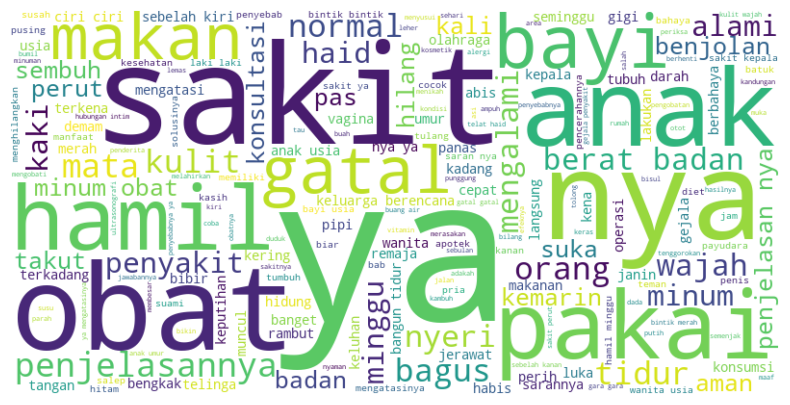

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gabungkan semua teks yang telah dibersihkan
text = ' '.join(df['processed_text'].astype(str))

# Buat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Tampilkan wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
from collections import Counter

# Hitung frekuensi kata
word_counts = Counter(text.split())

# Dapatkan 10 kata yang paling sering muncul
most_common_words = word_counts.most_common(2000)

# Urutkan dari yang paling jarang muncul
least_common_words = sorted(most_common_words, key=lambda x: x[1])

# Cetak 10 kata paling jarang muncul
print("10 Kata Paling Jarang Muncul (dari yang paling sering):")
for word, count in least_common_words:
    print(f"{word}: {count}")

10 Kata Paling Jarang Muncul (dari yang paling sering):
pucat: 4
sebutkan: 4
lidahnya: 4
sesering: 4
kebentur: 4
melompat: 4
keringatnya: 4
bebrapa: 4
sejujurnya: 4
biusnya: 4
kantuk: 4
autis: 4
fokus: 4
tengkurap: 4
respon: 4
mencukur: 4
bekukan: 4
kalpanak: 4
nyelip: 4
besarnya: 4
merusak: 4
terima: 4
dibanding: 4
sumber: 4
memijat: 4
lokasinya: 4
ketularan: 4
bagaiamana: 4
biayanya: 4
netes: 4
memperbesar: 4
hbs: 4
normalkah: 4
kedepannya: 4
blues: 4
68: 4
ngapain: 4
menggunkan: 4
ibs: 4
kasi: 4
frustasi: 4
seneng: 4
shampoo: 4
seumuran: 4
sampo: 4
bertahun: 4
random: 4
bagaiman: 4
adek: 4
aroma: 4
pacar: 4
setlah: 4
arti: 4
kacamat: 4
treadmill: 4
ad: 4
ceria: 4
perdarahan: 4
benjol: 4
loyo: 4
kabur: 4
keringnya: 4
awam: 4
kalo: 4
cemilan: 4
iklan: 4
bersila: 4
tie: 4
liang: 4
tertidur: 4
tegak: 4
sudut: 4
sekaarang: 4
disuntik: 4
bolak: 4
terapinya: 5
dipijit: 5
petunjuknya: 5
ekslusif: 5
tembok: 5
ngeluarin: 5
gradakan: 5
garukan: 5
berdengung: 5
menyembukan: 5
composition: 5
but

In [12]:

import matplotlib.pyplot as plt
from collections import Counter

# Assuming 'df' and 'text' are defined from the previous code

# Tokenize the text (you might need to adjust this based on your needs)
words = text.split()

# Count word frequencies
word_counts = Counter(words)

# Get the top N frequent words (e.g., top 20)
top_n = 2000
most_common_words = word_counts.most_common(top_n)

# Prepare data for the bar chart
words, frequencies = zip(*most_common_words)

most_common_words

[('ya', 2323),
 ('sakit', 1173),
 ('nya', 968),
 ('obat', 962),
 ('usia', 678),
 ('hamil', 630),
 ('anak', 610),
 ('pakai', 547),
 ('badan', 531),
 ('gatal', 512),
 ('minum', 511),
 ('makan', 504),
 ('haid', 500),
 ('2', 460),
 ('perut', 437),
 ('bayi', 433),
 ('kulit', 406),
 ('tidur', 394),
 ('mata', 386),
 ('penyakit', 379),
 ('minggu', 366),
 ('nyeri', 364),
 ('3', 355),
 ('wajah', 342),
 ('orang', 340),
 ('kaki', 326),
 ('mengalami', 302),
 ('1', 296),
 ('kiri', 296),
 ('sembuh', 294),
 ('makanan', 293),
 ('bagus', 292),
 ('penjelasannya', 292),
 ('berat', 280),
 ('normal', 279),
 ('air', 277),
 ('kanan', 274),
 ('gigi', 270),
 ('kepala', 268),
 ('kali', 258),
 ('ciri', 255),
 ('darah', 248),
 ('merah', 245),
 ('putih', 243),
 ('tangan', 242),
 ('wanita', 239),
 ('bintik', 238),
 ('benjolan', 231),
 ('batuk', 228),
 ('hilang', 225),
 ('luka', 215),
 ('alami', 206),
 ('panas', 205),
 ('sebelah', 204),
 ('5', 200),
 ('rambut', 196),
 ('menghilangkan', 195),
 ('muncul', 192),
 ('dema

# Modeling

## 1. MsMARCO

In [13]:
import pandas as pd
import re
import spacy
import torch
from transformers import (
    AutoTokenizer,
    AutoModelForSeq2SeqLM,
    AutoModel,
    T5ForConditionalGeneration,
    T5Tokenizer,
    MBart50Tokenizer,
    MBartForConditionalGeneration
)
from tqdm import tqdm

# Fungsi Pembersihan Teks
def clean_text(text):
    """
    Membersihkan teks dari karakter yang tidak relevan.
    """
    text = re.sub(r'[^\w\s]', '', text)  # Hapus karakter non-alfanumerik selain spasi
    text = re.sub(r'\s+', ' ', text)  # Hapus spasi ganda
    return text.strip()

# Fungsi Ekstraksi Fitur Dasar
def extract_basic_features(text):
    """
    Ekstraksi fitur dasar dari teks: jumlah kata dan jumlah karakter.
    """
    text_cleaned = clean_text(text)
    num_words = len(text_cleaned.split())
    num_chars = len(text_cleaned)
    return num_words, num_chars

# Fungsi Ekstraksi Fitur Vektor
def extract_vector_features(text, tokenizer, model):
    """
    Menghasilkan representasi vektor dari teks menggunakan model pretrained.
    """
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()

# Fungsi Inisialisasi Model
def initialize_model(model_name):
    """
    Menginisialisasi tokenizer dan model dari Hugging Face.
    """
    print(f"Loading model: {model_name}")
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
    return tokenizer, model

# Fungsi untuk Summarization ke dalam Format Pertanyaan
def summarize_to_question(text, tokenizer, model, max_length=150):
    """
    Meringkas teks input menjadi pertanyaan dengan format ringkas.
    """
    text = clean_text(text.lower().strip())
    prefix = "summarize to question: "
    input_text = prefix + text[:512]

    # Tokenisasi input
    inputs = tokenizer.encode(input_text, return_tensors="pt", max_length=512, truncation=True).to(device)

    # Inferensi dengan model
    with torch.no_grad():
        summary_ids = model.generate(
            inputs,
            max_length=max_length,
            min_length=30,
            no_repeat_ngram_size=2,
            num_beams=4,
            length_penalty=1.0,
            early_stopping=True,
        )
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True).strip()
    if not summary.endswith("?"):
        summary += "?"
    return summary

# Fungsi Batch Processing
def process_batch_to_questions(texts, tokenizer, model, batch_size=16):
    """
    Memproses batch teks untuk menghasilkan pertanyaan ringkas.
    """
    results = []
    with tqdm(total=len(texts)) as pbar:
        for i in range(0, len(texts), batch_size):
            batch = texts[i:i + batch_size]
            batch_questions = [summarize_to_question(text, tokenizer, model) for text in batch]
            results.extend(batch_questions)
            pbar.update(len(batch))
    return results

# Inisialisasi Perangkat (GPU atau CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Dataset Input
texts = df['processed_text'].tolist()[:1000]

# Model yang Akan Digunakan
model_names = [
    "doc2query/msmarco-indonesian-mt5-base-v1"
]

# Model untuk Ekstraksi Vektor
vector_model_name = "sentence-transformers/all-MiniLM-L6-v2"
vector_tokenizer = AutoTokenizer.from_pretrained(vector_model_name)
vector_model = AutoModel.from_pretrained(vector_model_name).to(device)

# Proses dengan Semua Model
results = {}
feature_data = []

for model_name in model_names:
    print(f"\nProcessing with model: {model_name}")
    tokenizer, model = initialize_model(model_name)
    model = model.to(device)  # Gunakan GPU jika tersedia

    # Proses batch untuk teks
    questions = process_batch_to_questions(texts, tokenizer, model)

    # Simpan hasil
    results[model_name] = questions

    # Tambahkan ke DataFrame
    column_name = f'Summarized_Question_{model_name.split("/")[-1]}'
    # Create a new DataFrame with the summarized questions
    df_questions = pd.DataFrame(questions, columns=[column_name], index=df.index[:len(questions)])
    # Concatenate the new DataFrame with the original DataFrame
    df = pd.concat([df, df_questions], axis=1)

    # Ekstraksi fitur dasar dan vektor
    for text, question in zip(texts, questions):
        num_words, num_chars = extract_basic_features(text)
        vector_features = extract_vector_features(text, vector_tokenizer, vector_model)
        feature_data.append({
            'original_text': text,
            'summarized_question': question,
            'num_words': num_words,
            'num_chars': num_chars,
            'vector_features': vector_features.tolist()
        })

    output_path = f'hasil_ringkasan_pertanyaan_{model_name.split("/")[-1]}.csv'
    df.to_csv(output_path, index=False)
    print(f"Hasil disimpan di: {output_path}")

# Simpan Hasil Fitur Ekstraksi
feature_df = pd.DataFrame(feature_data)
feature_df.to_csv('hasil_fitur_ekstraksi.csv', index=False)
print("Hasil fitur ekstraksi disimpan.")

# Simpan Hasil Akhir untuk Semua Model
df.to_csv('hasil_ringkasan_pertanyaan_semua_model.csv', index=False)
print("Semua hasil telah disimpan dalam satu file.")

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]


Processing with model: doc2query/msmarco-indonesian-mt5-base-v1
Loading model: doc2query/msmarco-indonesian-mt5-base-v1


tokenizer_config.json:   0%|          | 0.00/408 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/16.3M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/744 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.33G [00:00<?, ?B/s]

100%|██████████| 1000/1000 [12:04<00:00,  1.38it/s]


Hasil disimpan di: hasil_ringkasan_pertanyaan_msmarco-indonesian-mt5-base-v1.csv
Hasil fitur ekstraksi disimpan.
Semua hasil telah disimpan dalam satu file.


## 2. T5 Cendol

In [14]:
import pandas as pd
import re
import spacy
import torch
from transformers import (
    AutoTokenizer,
    AutoModelForSeq2SeqLM,
    AutoModel,
    T5ForConditionalGeneration,
    T5Tokenizer,
    MBart50Tokenizer,
    MBartForConditionalGeneration
)
from tqdm import tqdm

# Fungsi Pembersihan Teks
def clean_text(text):
    """
    Membersihkan teks dari karakter yang tidak relevan.
    """
    text = re.sub(r'[^\w\s]', '', text)  # Hapus karakter non-alfanumerik selain spasi
    text = re.sub(r'\s+', ' ', text)  # Hapus spasi ganda
    return text.strip()

# Fungsi Ekstraksi Fitur Dasar
def extract_basic_features(text):
    """
    Ekstraksi fitur dasar dari teks: jumlah kata dan jumlah karakter.
    """
    text_cleaned = clean_text(text)
    num_words = len(text_cleaned.split())
    num_chars = len(text_cleaned)
    return num_words, num_chars

# Fungsi Ekstraksi Fitur Vektor
def extract_vector_features(text, tokenizer, model):
    """
    Menghasilkan representasi vektor dari teks menggunakan model pretrained.
    """
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()

# Fungsi Inisialisasi Model
def initialize_model(model_name):
    """
    Menginisialisasi tokenizer dan model dari Hugging Face.
    """
    print(f"Loading model: {model_name}")
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
    return tokenizer, model

# Fungsi untuk Summarization ke dalam Format Pertanyaan
def summarize_to_question(text, tokenizer, model, max_length=150):
    """
    Meringkas teks input menjadi pertanyaan dengan format ringkas.
    """
    text = clean_text(text.lower().strip())
    prefix = "summarize to question: "
    input_text = prefix + text[:512]

    # Tokenisasi input
    inputs = tokenizer.encode(input_text, return_tensors="pt", max_length=512, truncation=True).to(device)

    # Inferensi dengan model
    with torch.no_grad():
        summary_ids = model.generate(
            inputs,
            max_length=max_length,
            min_length=30,
            no_repeat_ngram_size=2,
            num_beams=4,
            length_penalty=1.0,
            early_stopping=True,
        )
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True).strip()
    if not summary.endswith("?"):
        summary += "?"
    return summary

# Fungsi Batch Processing
def process_batch_to_questions(texts, tokenizer, model, batch_size=16):
    """
    Memproses batch teks untuk menghasilkan pertanyaan ringkas.
    """
    results = []
    with tqdm(total=len(texts)) as pbar:
        for i in range(0, len(texts), batch_size):
            batch = texts[i:i + batch_size]
            batch_questions = [summarize_to_question(text, tokenizer, model) for text in batch]
            results.extend(batch_questions)
            pbar.update(len(batch))
    return results

# Inisialisasi Perangkat (GPU atau CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Dataset Input
texts = df['processed_text'].tolist()[:1000]

# Model yang Akan Digunakan
model_names = [
    "indonlp/cendol-mt5-small-chat"
]

# Model untuk Ekstraksi Vektor
vector_model_name = "sentence-transformers/all-MiniLM-L6-v2"
vector_tokenizer = AutoTokenizer.from_pretrained(vector_model_name)
vector_model = AutoModel.from_pretrained(vector_model_name).to(device)

# Proses dengan Semua Model
results = {}
feature_data = []

for model_name in model_names:
    print(f"\nProcessing with model: {model_name}")
    tokenizer, model = initialize_model(model_name)
    model = model.to(device)  # Gunakan GPU jika tersedia

    # Proses batch untuk teks
    questions = process_batch_to_questions(texts, tokenizer, model)

    # Simpan hasil
    results[model_name] = questions

    # Tambahkan ke DataFrame
    column_name = f'Summarized_Question_{model_name.split("/")[-1]}'
    # Create a new DataFrame with the summarized questions
    df_questions = pd.DataFrame(questions, columns=[column_name], index=df.index[:len(questions)])
    # Concatenate the new DataFrame with the original DataFrame
    df = pd.concat([df, df_questions], axis=1)

    # Ekstraksi fitur dasar dan vektor
    for text, question in zip(texts, questions):
        num_words, num_chars = extract_basic_features(text)
        vector_features = extract_vector_features(text, vector_tokenizer, vector_model)
        feature_data.append({
            'original_text': text,
            'summarized_question': question,
            'num_words': num_words,
            'num_chars': num_chars,
            'vector_features': vector_features.tolist()
        })

    output_path = f'hasil_ringkasan_pertanyaan_{model_name.split("/")[-1]}.csv'
    df.to_csv(output_path, index=False)
    print(f"Hasil disimpan di: {output_path}")

# Simpan Hasil Fitur Ekstraksi
feature_df = pd.DataFrame(feature_data)
feature_df.to_csv('hasil_fitur_ekstraksi.csv', index=False)
print("Hasil fitur ekstraksi disimpan.")

# Simpan Hasil Akhir untuk Semua Model
df.to_csv('hasil_ringkasan_pertanyaan_semua_model.csv', index=False)
print("Semua hasil telah disimpan dalam satu file.")


Processing with model: indonlp/cendol-mt5-small-chat
Loading model: indonlp/cendol-mt5-small-chat


tokenizer_config.json:   0%|          | 0.00/330 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/16.3M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/74.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/816 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.23G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

100%|██████████| 1000/1000 [13:32<00:00,  1.23it/s]


Hasil disimpan di: hasil_ringkasan_pertanyaan_cendol-mt5-small-chat.csv
Hasil fitur ekstraksi disimpan.
Semua hasil telah disimpan dalam satu file.


## 3. T5 Large

In [15]:
import pandas as pd
import re
import spacy
import torch
from transformers import (
    AutoTokenizer,
    AutoModelForSeq2SeqLM,
    AutoModel,
    T5ForConditionalGeneration,
    T5Tokenizer,
    MBart50Tokenizer,
    MBartForConditionalGeneration
)
from tqdm import tqdm

# Fungsi Pembersihan Teks
def clean_text(text):
    """
    Membersihkan teks dari karakter yang tidak relevan.
    """
    text = re.sub(r'[^\w\s]', '', text)  # Hapus karakter non-alfanumerik selain spasi
    text = re.sub(r'\s+', ' ', text)  # Hapus spasi ganda
    return text.strip()

# Fungsi Ekstraksi Fitur Dasar
def extract_basic_features(text):
    """
    Ekstraksi fitur dasar dari teks: jumlah kata dan jumlah karakter.
    """
    text_cleaned = clean_text(text)
    num_words = len(text_cleaned.split())
    num_chars = len(text_cleaned)
    return num_words, num_chars

# Fungsi Ekstraksi Fitur Vektor
def extract_vector_features(text, tokenizer, model):
    """
    Menghasilkan representasi vektor dari teks menggunakan model pretrained.
    """
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()

# Fungsi Inisialisasi Model
def initialize_model(model_name):
    """
    Menginisialisasi tokenizer dan model dari Hugging Face.
    """
    print(f"Loading model: {model_name}")
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
    return tokenizer, model

# Fungsi untuk Summarization ke dalam Format Pertanyaan
def summarize_to_question(text, tokenizer, model, max_length=150):
    """
    Meringkas teks input menjadi pertanyaan dengan format ringkas.
    """
    text = clean_text(text.lower().strip())
    prefix = "summarize to question: "
    input_text = prefix + text[:512]

    # Tokenisasi input
    inputs = tokenizer.encode(input_text, return_tensors="pt", max_length=512, truncation=True).to(device)

    # Inferensi dengan model
    with torch.no_grad():
        summary_ids = model.generate(
            inputs,
            max_length=max_length,
            min_length=30,
            no_repeat_ngram_size=2,
            num_beams=4,
            length_penalty=1.0,
            early_stopping=True,
        )
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True).strip()
    if not summary.endswith("?"):
        summary += "?"
    return summary

# Fungsi Batch Processing
def process_batch_to_questions(texts, tokenizer, model, batch_size=16):
    """
    Memproses batch teks untuk menghasilkan pertanyaan ringkas.
    """
    results = []
    with tqdm(total=len(texts)) as pbar:
        for i in range(0, len(texts), batch_size):
            batch = texts[i:i + batch_size]
            batch_questions = [summarize_to_question(text, tokenizer, model) for text in batch]
            results.extend(batch_questions)
            pbar.update(len(batch))
    return results

# Inisialisasi Perangkat (GPU atau CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Dataset Input
texts = df['processed_text'].tolist()[:1000]

# Model yang Akan Digunakan
model_names = [
    "t5-large"
]

# Model untuk Ekstraksi Vektor
vector_model_name = "sentence-transformers/all-MiniLM-L6-v2"
vector_tokenizer = AutoTokenizer.from_pretrained(vector_model_name)
vector_model = AutoModel.from_pretrained(vector_model_name).to(device)

# Proses dengan Semua Model
results = {}
feature_data = []

for model_name in model_names:
    print(f"\nProcessing with model: {model_name}")
    tokenizer, model = initialize_model(model_name)
    model = model.to(device)  # Gunakan GPU jika tersedia

    # Proses batch untuk teks
    questions = process_batch_to_questions(texts, tokenizer, model)

    # Simpan hasil
    results[model_name] = questions

    # Tambahkan ke DataFrame
    column_name = f'Summarized_Question_{model_name.split("/")[-1]}'
    # Create a new DataFrame with the summarized questions
    df_questions = pd.DataFrame(questions, columns=[column_name], index=df.index[:len(questions)])
    # Concatenate the new DataFrame with the original DataFrame
    df = pd.concat([df, df_questions], axis=1)

    # Ekstraksi fitur dasar dan vektor
    for text, question in zip(texts, questions):
        num_words, num_chars = extract_basic_features(text)
        vector_features = extract_vector_features(text, vector_tokenizer, vector_model)
        feature_data.append({
            'original_text': text,
            'summarized_question': question,
            'num_words': num_words,
            'num_chars': num_chars,
            'vector_features': vector_features.tolist()
        })

    output_path = f'hasil_ringkasan_pertanyaan_{model_name.split("/")[-1]}.csv'
    df.to_csv(output_path, index=False)
    print(f"Hasil disimpan di: {output_path}")

# Simpan Hasil Fitur Ekstraksi
feature_df = pd.DataFrame(feature_data)
feature_df.to_csv('hasil_fitur_ekstraksi.csv', index=False)
print("Hasil fitur ekstraksi disimpan.")

# Simpan Hasil Akhir untuk Semua Model
df.to_csv('hasil_ringkasan_pertanyaan_semua_model.csv', index=False)
print("Semua hasil telah disimpan dalam satu file.")


Processing with model: t5-large
Loading model: t5-large


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.95G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

100%|██████████| 1000/1000 [35:05<00:00,  2.11s/it]


Hasil disimpan di: hasil_ringkasan_pertanyaan_t5-large.csv
Hasil fitur ekstraksi disimpan.
Semua hasil telah disimpan dalam satu file.


## 4. mBartLarge50

In [16]:
import pandas as pd
import re
import spacy
import torch
from transformers import (
    AutoTokenizer,
    AutoModelForSeq2SeqLM,
    AutoModel,
    T5ForConditionalGeneration,
    T5Tokenizer,
    MBart50Tokenizer,
    MBartForConditionalGeneration
)
from tqdm import tqdm

# Fungsi Pembersihan Teks
def clean_text(text):
    """
    Membersihkan teks dari karakter yang tidak relevan.
    """
    text = re.sub(r'[^\w\s]', '', text)  # Hapus karakter non-alfanumerik selain spasi
    text = re.sub(r'\s+', ' ', text)  # Hapus spasi ganda
    return text.strip()

# Fungsi Ekstraksi Fitur Dasar
def extract_basic_features(text):
    """
    Ekstraksi fitur dasar dari teks: jumlah kata dan jumlah karakter.
    """
    text_cleaned = clean_text(text)
    num_words = len(text_cleaned.split())
    num_chars = len(text_cleaned)
    return num_words, num_chars

# Fungsi Ekstraksi Fitur Vektor
def extract_vector_features(text, tokenizer, model):
    """
    Menghasilkan representasi vektor dari teks menggunakan model pretrained.
    """
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()

# Fungsi Inisialisasi Model
def initialize_model(model_name):
    """
    Menginisialisasi tokenizer dan model dari Hugging Face.
    """
    print(f"Loading model: {model_name}")
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
    return tokenizer, model

# Fungsi untuk Summarization ke dalam Format Pertanyaan
def summarize_to_question(text, tokenizer, model, max_length=150):
    """
    Meringkas teks input menjadi pertanyaan dengan format ringkas.
    """
    text = clean_text(text.lower().strip())
    prefix = "summarize to question: "
    input_text = prefix + text[:512]

    # Tokenisasi input
    inputs = tokenizer.encode(input_text, return_tensors="pt", max_length=512, truncation=True).to(device)

    # Inferensi dengan model
    with torch.no_grad():
        summary_ids = model.generate(
            inputs,
            max_length=max_length,
            min_length=30,
            no_repeat_ngram_size=2,
            num_beams=4,
            length_penalty=1.0,
            early_stopping=True,
        )
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True).strip()
    if not summary.endswith("?"):
        summary += "?"
    return summary

# Fungsi Batch Processing
def process_batch_to_questions(texts, tokenizer, model, batch_size=16):
    """
    Memproses batch teks untuk menghasilkan pertanyaan ringkas.
    """
    results = []
    with tqdm(total=len(texts)) as pbar:
        for i in range(0, len(texts), batch_size):
            batch = texts[i:i + batch_size]
            batch_questions = [summarize_to_question(text, tokenizer, model) for text in batch]
            results.extend(batch_questions)
            pbar.update(len(batch))
    return results

# Inisialisasi Perangkat (GPU atau CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Dataset Input
texts = df['processed_text'].tolist()[:1000]

# Model yang Akan Digunakan
model_names = [
    "facebook/mbart-large-50"
]

# Model untuk Ekstraksi Vektor
vector_model_name = "sentence-transformers/all-MiniLM-L6-v2"
vector_tokenizer = AutoTokenizer.from_pretrained(vector_model_name)
vector_model = AutoModel.from_pretrained(vector_model_name).to(device)

# Proses dengan Semua Model
results = {}
feature_data = []

for model_name in model_names:
    print(f"\nProcessing with model: {model_name}")
    tokenizer, model = initialize_model(model_name)
    model = model.to(device)  # Gunakan GPU jika tersedia

    # Proses batch untuk teks
    questions = process_batch_to_questions(texts, tokenizer, model)

    # Simpan hasil
    results[model_name] = questions

    # Tambahkan ke DataFrame
    column_name = f'Summarized_Question_{model_name.split("/")[-1]}'
    # Create a new DataFrame with the summarized questions
    df_questions = pd.DataFrame(questions, columns=[column_name], index=df.index[:len(questions)])
    # Concatenate the new DataFrame with the original DataFrame
    df = pd.concat([df, df_questions], axis=1)

    # Ekstraksi fitur dasar dan vektor
    for text, question in zip(texts, questions):
        num_words, num_chars = extract_basic_features(text)
        vector_features = extract_vector_features(text, vector_tokenizer, vector_model)
        feature_data.append({
            'original_text': text,
            'summarized_question': question,
            'num_words': num_words,
            'num_chars': num_chars,
            'vector_features': vector_features.tolist()
        })

    output_path = f'hasil_ringkasan_pertanyaan_{model_name.split("/")[-1]}.csv'
    df.to_csv(output_path, index=False)
    print(f"Hasil disimpan di: {output_path}")

# Simpan Hasil Fitur Ekstraksi
feature_df = pd.DataFrame(feature_data)
feature_df.to_csv('hasil_fitur_ekstraksi.csv', index=False)
print("Hasil fitur ekstraksi disimpan.")

# Simpan Hasil Akhir untuk Semua Model
df.to_csv('hasil_ringkasan_pertanyaan_semua_model.csv', index=False)
print("Semua hasil telah disimpan dalam satu file.")


Processing with model: facebook/mbart-large-50
Loading model: facebook/mbart-large-50


tokenizer_config.json:   0%|          | 0.00/531 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/649 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.44G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/261 [00:00<?, ?B/s]

100%|██████████| 1000/1000 [09:47<00:00,  1.70it/s]


Hasil disimpan di: hasil_ringkasan_pertanyaan_mbart-large-50.csv
Hasil fitur ekstraksi disimpan.
Semua hasil telah disimpan dalam satu file.


## 5. Pegasus

In [17]:
import pandas as pd
import re
import spacy
import torch
from transformers import (
    AutoTokenizer,
    AutoModelForSeq2SeqLM,
    AutoModel,
    T5ForConditionalGeneration,
    T5Tokenizer,
    MBart50Tokenizer,
    MBartForConditionalGeneration
)
from tqdm import tqdm

# Fungsi Pembersihan Teks
def clean_text(text):
    """
    Membersihkan teks dari karakter yang tidak relevan.
    """
    text = re.sub(r'[^\w\s]', '', text)  # Hapus karakter non-alfanumerik selain spasi
    text = re.sub(r'\s+', ' ', text)  # Hapus spasi ganda
    return text.strip()

# Fungsi Ekstraksi Fitur Dasar
def extract_basic_features(text):
    """
    Ekstraksi fitur dasar dari teks: jumlah kata dan jumlah karakter.
    """
    text_cleaned = clean_text(text)
    num_words = len(text_cleaned.split())
    num_chars = len(text_cleaned)
    return num_words, num_chars

# Fungsi Ekstraksi Fitur Vektor
def extract_vector_features(text, tokenizer, model):
    """
    Menghasilkan representasi vektor dari teks menggunakan model pretrained.
    """
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()

# Fungsi Inisialisasi Model
def initialize_model(model_name):
    """
    Menginisialisasi tokenizer dan model dari Hugging Face.
    """
    print(f"Loading model: {model_name}")
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
    return tokenizer, model

# Fungsi untuk Summarization ke dalam Format Pertanyaan
def summarize_to_question(text, tokenizer, model, max_length=150):
    """
    Meringkas teks input menjadi pertanyaan dengan format ringkas.
    """
    text = clean_text(text.lower().strip())
    prefix = "summarize to question: "
    input_text = prefix + text[:512]

    # Tokenisasi input
    inputs = tokenizer.encode(input_text, return_tensors="pt", max_length=512, truncation=True).to(device)

    # Inferensi dengan model
    with torch.no_grad():
        summary_ids = model.generate(
            inputs,
            max_length=max_length,
            min_length=30,
            no_repeat_ngram_size=2,
            num_beams=4,
            length_penalty=1.0,
            early_stopping=True,
        )
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True).strip()
    if not summary.endswith("?"):
        summary += "?"
    return summary

# Fungsi Batch Processing
def process_batch_to_questions(texts, tokenizer, model, batch_size=16):
    """
    Memproses batch teks untuk menghasilkan pertanyaan ringkas.
    """
    results = []
    with tqdm(total=len(texts)) as pbar:
        for i in range(0, len(texts), batch_size):
            batch = texts[i:i + batch_size]
            batch_questions = [summarize_to_question(text, tokenizer, model) for text in batch]
            results.extend(batch_questions)
            pbar.update(len(batch))
    return results

# Inisialisasi Perangkat (GPU atau CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Dataset Input
texts = df['processed_text'].tolist()[:1000]

# Model yang Akan Digunakan
model_names = [
    "google/pegasus-xsum"
]

# Model untuk Ekstraksi Vektor
vector_model_name = "sentence-transformers/all-MiniLM-L6-v2"
vector_tokenizer = AutoTokenizer.from_pretrained(vector_model_name)
vector_model = AutoModel.from_pretrained(vector_model_name).to(device)

# Proses dengan Semua Model
results = {}
feature_data = []

for model_name in model_names:
    print(f"\nProcessing with model: {model_name}")
    tokenizer, model = initialize_model(model_name)
    model = model.to(device)  # Gunakan GPU jika tersedia

    # Proses batch untuk teks
    questions = process_batch_to_questions(texts, tokenizer, model)

    # Simpan hasil
    results[model_name] = questions

    # Tambahkan ke DataFrame
    column_name = f'Summarized_Question_{model_name.split("/")[-1]}'
    # Create a new DataFrame with the summarized questions
    df_questions = pd.DataFrame(questions, columns=[column_name], index=df.index[:len(questions)])
    # Concatenate the new DataFrame with the original DataFrame
    df = pd.concat([df, df_questions], axis=1)

    # Ekstraksi fitur dasar dan vektor
    for text, question in zip(texts, questions):
        num_words, num_chars = extract_basic_features(text)
        vector_features = extract_vector_features(text, vector_tokenizer, vector_model)
        feature_data.append({
            'original_text': text,
            'summarized_question': question,
            'num_words': num_words,
            'num_chars': num_chars,
            'vector_features': vector_features.tolist()
        })

    output_path = f'hasil_ringkasan_pertanyaan_{model_name.split("/")[-1]}.csv'
    df.to_csv(output_path, index=False)
    print(f"Hasil disimpan di: {output_path}")

# Simpan Hasil Fitur Ekstraksi
feature_df = pd.DataFrame(feature_data)
feature_df.to_csv('hasil_fitur_ekstraksi.csv', index=False)
print("Hasil fitur ekstraksi disimpan.")

# Simpan Hasil Akhir untuk Semua Model
df.to_csv('hasil_ringkasan_pertanyaan_semua_model.csv', index=False)
print("Semua hasil telah disimpan dalam satu file.")


Processing with model: google/pegasus-xsum
Loading model: google/pegasus-xsum


tokenizer_config.json:   0%|          | 0.00/87.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.52M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/259 [00:00<?, ?B/s]

100%|██████████| 1000/1000 [11:22<00:00,  1.46it/s]


Hasil disimpan di: hasil_ringkasan_pertanyaan_pegasus-xsum.csv
Hasil fitur ekstraksi disimpan.
Semua hasil telah disimpan dalam satu file.


## 6. Unifiedqa T5

In [18]:
import pandas as pd
import re
import spacy
import torch
from transformers import (
    AutoTokenizer,
    AutoModelForSeq2SeqLM,
    AutoModel,
    T5ForConditionalGeneration,
    T5Tokenizer,
    MBart50Tokenizer,
    MBartForConditionalGeneration
)
from tqdm import tqdm

# Fungsi Pembersihan Teks
def clean_text(text):
    """
    Membersihkan teks dari karakter yang tidak relevan.
    """
    text = re.sub(r'[^\w\s]', '', text)  # Hapus karakter non-alfanumerik selain spasi
    text = re.sub(r'\s+', ' ', text)  # Hapus spasi ganda
    return text.strip()

# Fungsi Ekstraksi Fitur Dasar
def extract_basic_features(text):
    """
    Ekstraksi fitur dasar dari teks: jumlah kata dan jumlah karakter.
    """
    text_cleaned = clean_text(text)
    num_words = len(text_cleaned.split())
    num_chars = len(text_cleaned)
    return num_words, num_chars

# Fungsi Ekstraksi Fitur Vektor
def extract_vector_features(text, tokenizer, model):
    """
    Menghasilkan representasi vektor dari teks menggunakan model pretrained.
    """
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()

# Fungsi Inisialisasi Model
def initialize_model(model_name):
    """
    Menginisialisasi tokenizer dan model dari Hugging Face.
    """
    print(f"Loading model: {model_name}")
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
    return tokenizer, model

# Fungsi untuk Summarization ke dalam Format Pertanyaan
def summarize_to_question(text, tokenizer, model, max_length=150):
    """
    Meringkas teks input menjadi pertanyaan dengan format ringkas.
    """
    text = clean_text(text.lower().strip())
    prefix = "summarize to question: "
    input_text = prefix + text[:512]

    # Tokenisasi input
    inputs = tokenizer.encode(input_text, return_tensors="pt", max_length=512, truncation=True).to(device)

    # Inferensi dengan model
    with torch.no_grad():
        summary_ids = model.generate(
            inputs,
            max_length=max_length,
            min_length=30,
            no_repeat_ngram_size=2,
            num_beams=4,
            length_penalty=1.0,
            early_stopping=True,
        )
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True).strip()
    if not summary.endswith("?"):
        summary += "?"
    return summary

# Fungsi Batch Processing
def process_batch_to_questions(texts, tokenizer, model, batch_size=16):
    """
    Memproses batch teks untuk menghasilkan pertanyaan ringkas.
    """
    results = []
    with tqdm(total=len(texts)) as pbar:
        for i in range(0, len(texts), batch_size):
            batch = texts[i:i + batch_size]
            batch_questions = [summarize_to_question(text, tokenizer, model) for text in batch]
            results.extend(batch_questions)
            pbar.update(len(batch))
    return results

# Inisialisasi Perangkat (GPU atau CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Dataset Input
texts = df['processed_text'].tolist()[:1000]

# Model yang Akan Digunakan
model_names = [

    "allenai/unifiedqa-t5-base"
]

# Model untuk Ekstraksi Vektor
vector_model_name = "sentence-transformers/all-MiniLM-L6-v2"
vector_tokenizer = AutoTokenizer.from_pretrained(vector_model_name)
vector_model = AutoModel.from_pretrained(vector_model_name).to(device)

# Proses dengan Semua Model
results = {}
feature_data = []

for model_name in model_names:
    print(f"\nProcessing with model: {model_name}")
    tokenizer, model = initialize_model(model_name)
    model = model.to(device)  # Gunakan GPU jika tersedia

    # Proses batch untuk teks
    questions = process_batch_to_questions(texts, tokenizer, model)

    # Simpan hasil
    results[model_name] = questions

    # Tambahkan ke DataFrame
    column_name = f'Summarized_Question_{model_name.split("/")[-1]}'
    # Create a new DataFrame with the summarized questions
    df_questions = pd.DataFrame(questions, columns=[column_name], index=df.index[:len(questions)])
    # Concatenate the new DataFrame with the original DataFrame
    df = pd.concat([df, df_questions], axis=1)

    # Ekstraksi fitur dasar dan vektor
    for text, question in zip(texts, questions):
        num_words, num_chars = extract_basic_features(text)
        vector_features = extract_vector_features(text, vector_tokenizer, vector_model)
        feature_data.append({
            'original_text': text,
            'summarized_question': question,
            'num_words': num_words,
            'num_chars': num_chars,
            'vector_features': vector_features.tolist()
        })

    output_path = f'hasil_ringkasan_pertanyaan_{model_name.split("/")[-1]}.csv'
    df.to_csv(output_path, index=False)
    print(f"Hasil disimpan di: {output_path}")

# Simpan Hasil Fitur Ekstraksi
feature_df = pd.DataFrame(feature_data)
feature_df.to_csv('hasil_fitur_ekstraksi.csv', index=False)
print("Hasil fitur ekstraksi disimpan.")

# Simpan Hasil Akhir untuk Semua Model
df.to_csv('hasil_ringkasan_pertanyaan_semua_model.csv', index=False)
print("Semua hasil telah disimpan dalam satu file.")


Processing with model: allenai/unifiedqa-t5-base
Loading model: allenai/unifiedqa-t5-base


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


pytorch_model.bin:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

100%|██████████| 1000/1000 [11:17<00:00,  1.48it/s]


Hasil disimpan di: hasil_ringkasan_pertanyaan_unifiedqa-t5-base.csv
Hasil fitur ekstraksi disimpan.
Semua hasil telah disimpan dalam satu file.


# Output Perbandingan Semua Model

In [20]:
semua_model = pd.read_csv('/kaggle/working/hasil_ringkasan_pertanyaan_unifiedqa-t5-base.csv')
semua_model.drop(columns=['full_text','cleaned_text'], inplace=True)
semua_model.head()

,summary,processed_text,Summarized_Question_msmarco-indonesian-mt5-base-v1,Summarized_Question_cendol-mt5-small-chat,Summarized_Question_t5-large,Summarized_Question_mbart-large-50,Summarized_Question_pegasus-xsum,Summarized_Question_unifiedqa-t5-base
0,Ciri-ciri bayi sakit perut dan cara mengatasinya,bayi usia 9 menangis berhenti henti tangan kaki dingin wajah lemas pucat badan demam batuk pilek perutnya kembung menceret sebutkan ciri ciri bayi sakit perut mengatasinya,apa yang menyebabkan bayi menangis berhenti henti tangan kaki dingin pucat badan dan wajah lemas di sekitar perut?,bayi usia 9 menangis berhenti henti tangan kaki dingin wajah lemas pucat badan demam batuk pilek perutnya kembung menceret?,bayi usia 9 menangis berhenti tangan kaki dingin wajah lemas pucat badan demam batuk pilek perutnya kembung menceret sebutkan ciri baye .?,summarize to question: bayi usia 9 menangis berhenti berhenti henti tangan kaki dingin wajah lemas pucat badan demam batuk pilek perutnya kembung menceret sebutkan ciri ciri bayi sakit perut mengatasinya apa yang harus kita lakukan jika bayi kita menangis?,"Is there a way to tell if a man who has been in a coma for 10 years is still alive?, asks the BBC's Mark Lowen.?",bayi usia 9 menangis berhenti hente tangan kaki dingin wajah lemas pucat badan demam batuk pilek perutnya kembung menceret?
1,Sakit perut kanan bawah sampai ke pinggang,wanita 29 keluhan sakit perut kanan pinggang nyut nyutan tusuk tusuk,apakah sakit perut kanan atas menyebabkan nyeri nyut nyutan tusuk tulang belakang bagian bawah nyutnya?,Wanita 29 keluhan sakit perut kanan pinggang nyut nyutan tusuk tuuk tumbuk - adegan ringan?,wanita 29 keluhan sakit perut kanan pinggang nyut tusuk .?,summarize to question: wanita 29 years old who has had a sakit perut kanan pinggang nyut nyutan tusuk tususuk.?,BBC News NI asks the question: what is the most important thing that you can do to improve the lives of people living in poverty in Kenya?,wanita 29 keluhan sakit perut kanan pinggang nyut otusuk?
2,Cara mengatasi panas dingin dan mual,semalam badan panas dingin mual mual muntah dpunggung lok d urut mual tdur nyenyak sesak napas miring kekiri kanan serba enak ap masuk angin bysa,apa yang terjadi ketika badan Anda panas dingin dan muntah tiba-tiba di punggung Anda sesak napas miring ke kiri kanan?,Badan panas dingin mual muntah dpunggung Lok di urut muala tdur nyenyak sesak napas miring ke kiri kanan serba enak ap masuk angin bysa?,serba enak ap masuk angin bysa semalam badan panas dingin mual .?,"summarize to question: ""What is the best way to treat a cold?"": badan panas dingin mual muil muntah dpunggung lok d urut tdur nyenyak sesak napas miring kekiri kanan serba enak ap masuk angin bysa?","Is there a way to get the Indonesian government to stop using the word ""kampung"" in the name of Islam, which is used as a derogatory term for Muslims?",dpunggung lok da urut mual tdur nyenyak sesak napas miring kekiri kanan?
3,"Hidung terasa kering, apa penyebabnya?",ya hidung pilek kering perih panas tht didiagnosis deviasi septum hidung pengaruhnya gara gara,apa yang menyebabkan hidung pilek kering perih panas di gara gara karena gangguan septum di sekitar gara?,Hidung pilek kering perih panas tht didiagnosis deviasi septum hidung pengaruhnya karena adanya peningkatan suhu tubuh.?,ya hidung pilek kering perih panas tht didiagnosis deviasi septum .?,summarize to question: ya hidung pilek kering perih panas tht didiagnosis deviasi septum hidung pengaruhnya gara gara?,"What is the best way to tell if you have a septum or a pilek, and what should you do if it turns out to be the case?",ya hidung pilek kering perih panas tht didiagnosis deviasi septum?
4,Obat pembasmi kutu rambut di apotek,adik kelas a5 sd pulang pondok pesantren kutuan rambutnya ya hilangin kutunya apotek namanya obat pembasmi kutu rambut,apakah ada obat pembasmi kutu di rambutmu jika kamu hilangnya kutunya a5 sd pulang pondok pesantren?,kakak kelas a5 sd pulang pondok pesant

# Evaluasi Model

In [21]:
!pip install rouge_score

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=36560c46f323ba7fbe173e5f02d05928b145719421827877e2e9356dda445764
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [23]:
from rouge_score import rouge_scorer

# Contoh penggunaan
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Fungsi untuk menghitung skor ROUGE untuk setiap model
def calculate_rouge_scores(df, reference_column, model_columns):
    scores = {}
    for col in model_columns:
        scores[col] = {'rouge1': [], 'rouge2': [], 'rougeL': []}

    for index, row in df.iterrows():
        reference = row[reference_column]
        # Check if reference is a string, if not, skip it
        if isinstance(reference, str):
            for col in model_columns:
                hypothesis = row[col]
                # Check if hypothesis is a string, if not, skip it
                if isinstance(hypothesis, str):
                    scores_i = scorer.score(reference, hypothesis)
                    scores[col]['rouge1'].append(scores_i['rouge1'].fmeasure)
                    scores[col]['rouge2'].append(scores_i['rouge2'].fmeasure)
                    scores[col]['rougeL'].append(scores_i['rougeL'].fmeasure)

    return scores

# Kolom yang akan dievaluasi
reference_column = 'summary' # Ganti dengan nama kolom teks referensi yang sesuai
model_columns = ['Summarized_Question_msmarco-indonesian-mt5-base-v1', 'Summarized_Question_cendol-mt5-small-chat', 'Summarized_Question_t5-large', 'Summarized_Question_mbart-large-50',
                 'Summarized_Question_pegasus-xsum', 'Summarized_Question_unifiedqa-t5-base']

# Hitung skor ROUGE
rouge_scores = calculate_rouge_scores(semua_model, reference_column, model_columns)

# Hitung rata-rata skor ROUGE untuk setiap model
avg_rouge_scores = {}
for model, metrics in rouge_scores.items():
    avg_rouge_scores[model] = {
        'rouge1': sum(metrics['rouge1']) / len(metrics['rouge1']),
        'rouge2': sum(metrics['rouge2']) / len(metrics['rouge2']),
        'rougeL': sum(metrics['rougeL']) / len(metrics['rougeL'])
    }

# Tampilkan hasil
for model, scores in avg_rouge_scores.items():
    print(f"Model: {model}")
    print(f"  Rouge-1: {scores['rouge1']:.4f}")
    print(f"  Rouge-2: {scores['rouge2']:.4f}")
    print(f"  Rouge-L: {scores['rougeL']:.4f}")

Model: Summarized_Question_msmarco-indonesian-mt5-base-v1
  Rouge-1: 0.2564
  Rouge-2: 0.0688
  Rouge-L: 0.2092
Model: Summarized_Question_cendol-mt5-small-chat
  Rouge-1: 0.2397
  Rouge-2: 0.0659
  Rouge-L: 0.1941
Model: Summarized_Question_t5-large
  Rouge-1: 0.2901
  Rouge-2: 0.0761
  Rouge-L: 0.2338
Model: Summarized_Question_mbart-large-50
  Rouge-1: 0.2134
  Rouge-2: 0.0673
  Rouge-L: 0.1798
Model: Summarized_Question_pegasus-xsum
  Rouge-1: 0.0403
  Rouge-2: 0.0073
  Rouge-L: 0.0349
Model: Summarized_Question_unifiedqa-t5-base
  Rouge-1: 0.2982
  Rouge-2: 0.0810
  Rouge-L: 0.2496


In [24]:
!pip install sacrebleu

from sacrebleu.metrics import BLEU

# Fungsi untuk menghitung skor BLEU untuk setiap model
def calculate_bleu_scores(df, reference_column, model_columns):
    bleu = BLEU()
    scores = {}
    for col in model_columns:
        scores[col] = []

    for index, row in df.iterrows():
        reference = [row[reference_column]]
        # Check if reference is a string, if not, skip it
        if isinstance(reference[0], str):
            for col in model_columns:
                hypothesis = row[col]
                # Check if hypothesis is a string, if not, skip it
                if isinstance(hypothesis, str):
                    score = bleu.sentence_score(hypothesis, reference).score
                    scores[col].append(score)
    return scores

# Kolom yang akan dievaluasi
reference_column = 'summary'  # Ganti dengan nama kolom teks referensi yang sesuai
model_columns = ['Summarized_Question_msmarco-indonesian-mt5-base-v1', 'Summarized_Question_cendol-mt5-small-chat', 'Summarized_Question_t5-large', 'Summarized_Question_mbart-large-50',
                 'Summarized_Question_pegasus-xsum', 'Summarized_Question_unifiedqa-t5-base']
# Hitung skor BLEU
bleu_scores = calculate_bleu_scores(semua_model, reference_column, model_columns)

# Hitung rata-rata skor BLEU untuk setiap model
avg_bleu_scores = {}
for model, model_scores in bleu_scores.items():
    if model_scores:  # Periksa apakah daftar skor tidak kosong
        avg_bleu_scores[model] = sum(model_scores) / len(model_scores)
    else:
        avg_bleu_scores[model] = 0  # Atau nilai default lainnya jika daftar kosong

# Tampilkan hasil
for model, score in avg_bleu_scores.items():
    print(f"Model: {model}")
    print(f"  BLEU: {score:.4f}")

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.0/104.0 kB 8.6 MB/s eta 0:00:00
Model: Summarized_Question_msmarco-indonesian-mt5-base-v1
  BLEU: 4.2615
Model: Summarized_Question_cendol-mt5-small-chat
  BLEU: 3.4210
Model: Summarized_Question_t5-large
  BLEU: 5.4499
Model: Summarized_Question_mbart-large-50
  BLEU: 3.0429
Model: Summarized_Question_pegasus-xsum
  BLEU: 1.1245
Model: Summarized_Question_unifiedqa-t5-base
  BLEU: 6.8375


# Fine Tuned Model Terbaik

## Fine Tuning Model

In [25]:
!pip install evaluate

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 4.9 MB/s eta 0:00:00


In [34]:
import pandas as pd
from datasets import Dataset
from transformers import (
    AutoModelForSeq2SeqLM,
    AutoTokenizer,
    Seq2SeqTrainer,
    Seq2SeqTrainingArguments
)
from evaluate import load

# Load Dataset
df = pd.read_csv('/kaggle/input/hasil-model/hasil_ringkasan_pertanyaan_semua_model.csv')

# Rename columns sesuai kebutuhan model
df_renamed = df.rename(columns={"processed_text": "input_text", "summary": "target_text"})

# Konversi DataFrame ke Hugging Face Dataset
dataset = Dataset.from_pandas(df_renamed)

# Split data menjadi train dan test
dataset = dataset.train_test_split(test_size=0.2, seed=42)

# Load Model dan Tokenizer
model_name = "allenai/unifiedqa-t5-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# Preprocessing fungsi
def preprocess_function(examples):
    inputs = tokenizer(
        examples["input_text"], max_length=512, truncation=True, padding="max_length"
    )
    targets = tokenizer(
        examples["target_text"], max_length=64, truncation=True, padding="max_length"
    )
    inputs["labels"] = targets["input_ids"]
    return inputs

# Tokenisasi dataset
tokenized_datasets = dataset.map(preprocess_function, batched=True)

# Define Training Arguments dengan max_steps
training_args = Seq2SeqTrainingArguments(
    output_dir="./fine_tuned_model",
    evaluation_strategy="steps",  # Evaluasi berdasarkan langkah
    eval_steps=500,               # Evaluasi setiap 500 langkah
    learning_rate=5e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    weight_decay=0.01,
    save_total_limit=3,
    max_steps=2000,  # Tentukan jumlah langkah maksimum
    predict_with_generate=True,
    fp16=True if torch.cuda.is_available() else False,
    logging_dir="./logs",
    logging_steps=100,  # Logging setiap 100 langkah
)

# Initialize Trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    tokenizer=tokenizer,
)

# Fine-Tune the Model
trainer.train()

# Save the fine-tuned model
trainer.save_model("./fine_tuned_model")
tokenizer.save_pretrained("./fine_tuned_model")
print("Fine-tuning selesai dan model telah disimpan.")

# Evaluasi dan Simpan Hasil Prediksi ke CSV
def evaluate_and_save_results(model, tokenizer, dataset, output_csv):
    references = []
    predictions = []
    inputs_text = []

    for example in dataset:
        input_text = example["input_text"]
        target_text = example["target_text"]

        # Generate prediction
        inputs = tokenizer(
            input_text, return_tensors="pt", truncation=True, padding=True, max_length=512
        ).to(model.device)
        with torch.no_grad():
            outputs = model.generate(
                inputs["input_ids"], max_length=64, num_beams=4, early_stopping=True
            )
        prediction = tokenizer.decode(outputs[0], skip_special_tokens=True)

        # Append references, predictions, and input texts
        inputs_text.append(input_text)
        references.append(target_text)
        predictions.append(prediction)

    # Simpan ke DataFrame dan CSV
    results_df = pd.DataFrame({
        "input_text": inputs_text,
        "target_text": references,
        "predicted_text": predictions
    })
    results_df.to_csv(output_csv, index=False)
    print(f"Hasil prediksi disimpan di: {output_csv}")

# Panggil fungsi evaluasi dan simpan hasil ke CSV
output_csv_path = "hasil_evaluasi_fine_tune.csv"
evaluate_and_save_results(model, tokenizer, tokenized_datasets["test"], output_csv_path)


Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/tmp/ipykernel_23/547066168.py:60: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(
max_steps is given, it will override any value given in num_train_epochs


Step,Training Loss,Validation Loss
500,0.611500,0.554420
1000,0.493500,0.510677
1500,0.405600,0.493356
2000,0.393000,0.488810


Fine-tuning selesai dan model telah disimpan.
Hasil prediksi disimpan di: hasil_evaluasi_fine_tune.csv


In [43]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from tqdm import tqdm

# Load the fine-tuned model and tokenizer
model_name = "./fine_tuned_model"  # Path to the fine-tuned model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name).to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))

# Load the dataset to predict
input_csv_path = '/kaggle/working/hasil_ringkasan_pertanyaan_unifiedqa-t5-base.csv'  # Replace with your input CSV file path
data = pd.read_csv(input_csv_path)

# Ensure the required column (e.g., "processed_text") exists
if "processed_text" not in data.columns:
    raise ValueError("The column 'processed_text' is not found in the dataset.")

# Take only the first 1000 rows
data = data.head(1000)

# Function to generate predictions
def generate_predictions(model, tokenizer, texts):
    predictions = []
    for text in tqdm(texts, desc="Generating Predictions"):
        # Tokenize the input
        inputs = tokenizer(
            text, return_tensors="pt", truncation=True, padding=True, max_length=512
        ).to(model.device)
        
        # Generate predictions
        with torch.no_grad():
            outputs = model.generate(
                inputs["input_ids"], max_length=64, num_beams=4, early_stopping=True
            )
        prediction = tokenizer.decode(outputs[0], skip_special_tokens=True)
        predictions.append(prediction)
    return predictions

# Generate predictions for the dataset
texts = data["processed_text"].tolist()  # Column containing input texts
predictions = generate_predictions(model, tokenizer, texts)

# Add predictions to the DataFrame
data["predicted_text"] = predictions

# Save the results to a new CSV file
output_csv_path = '/kaggle/working/hasil_ringkasan_finetuned_1000.csv'  # Replace with your desired output path
data.to_csv(output_csv_path, index=False)
print(f"Hasil prediksi disimpan di: {output_csv_path}")


Generating Predictions: 100%|██████████| 1000/1000 [06:55<00:00,  2.41it/s]

Hasil prediksi disimpan di: /kaggle/working/hasil_ringkasan_finetuned_1000.csv


## Eval

In [46]:
from rouge_score import rouge_scorer
import pandas as pd

# Load dataset
df_ft = pd.read_csv('/kaggle/working/hasil_ringkasan_finetuned_1000.csv')

# Inisialisasi RougeScorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Fungsi untuk menghitung skor ROUGE untuk setiap model
def calculate_rouge_scores(df, reference_column, model_column):
    scores = {'rouge1': [], 'rouge2': [], 'rougeL': []}

    for index, row in df.iterrows():
        reference = row[reference_column]
        hypothesis = row[model_column]

        # Check if reference and hypothesis are strings, skip if not
        if isinstance(reference, str) and isinstance(hypothesis, str):
            score = scorer.score(reference, hypothesis)
            scores['rouge1'].append(score['rouge1'].fmeasure)
            scores['rouge2'].append(score['rouge2'].fmeasure)
            scores['rougeL'].append(score['rougeL'].fmeasure)

    return scores

# Kolom yang akan dievaluasi
reference_column = 'summary'  # Kolom teks referensi
model_column = 'predicted_text'  # Kolom teks hasil prediksi

# Hitung skor ROUGE
rouge_scores = calculate_rouge_scores(df_ft, reference_column, model_column)

# Hitung rata-rata skor ROUGE
average_rouge_scores = {
    'rouge1': sum(rouge_scores['rouge1']) / len(rouge_scores['rouge1']),
    'rouge2': sum(rouge_scores['rouge2']) / len(rouge_scores['rouge2']),
    'rougeL': sum(rouge_scores['rougeL']) / len(rouge_scores['rougeL']),
}

# Tampilkan hasil rata-rata
print("Average ROUGE Scores:")
print(f"  Rouge-1: {average_rouge_scores['rouge1']:.4f}")
print(f"  Rouge-2: {average_rouge_scores['rouge2']:.4f}")
print(f"  Rouge-L: {average_rouge_scores['rougeL']:.4f}")

# Tambahkan skor ROUGE ke DataFrame untuk setiap row
df_ft['rouge1'] = rouge_scores['rouge1']
df_ft['rouge2'] = rouge_scores['rouge2']
df_ft['rougeL'] = rouge_scores['rougeL']

# Simpan hasil ke file baru
output_file = '/kaggle/working/hasil_evaluasi_1000_with_rouge.csv'
df_ft.to_csv(output_file, index=False)
print(f"Hasil dengan skor ROUGE per row disimpan di: {output_file}")


Average ROUGE Scores:
  Rouge-1: 0.4992
  Rouge-2: 0.2800
  Rouge-L: 0.4760
Hasil dengan skor ROUGE per row disimpan di: /kaggle/working/hasil_evaluasi_1000_with_rouge.csv


In [48]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import pandas as pd

# Load dataset
df_ft = pd.read_csv('/kaggle/working/hasil_evaluasi_1000_with_rouge.csv')

# Smoothing function for BLEU
smoothing = SmoothingFunction().method1

# Fungsi untuk menghitung skor BLEU untuk setiap baris
def calculate_bleu_scores(df, reference_column, model_column):
    bleu_scores = []
    
    for index, row in df.iterrows():
        reference = row[reference_column]
        hypothesis = row[model_column]

        # Check if reference and hypothesis are strings, skip if not
        if isinstance(reference, str) and isinstance(hypothesis, str):
            score = sentence_bleu(
                [reference.split()],  # Reference must be a list of tokens
                hypothesis.split(),  # Hypothesis must be a list of tokens
                smoothing_function=smoothing
            )
            bleu_scores.append(score)
        else:
            bleu_scores.append(0.0)  # Assign 0 if invalid text

    return bleu_scores

# Kolom yang akan dievaluasi
reference_column = 'summary'  # Kolom teks referensi
model_column = 'predicted_text'  # Kolom teks hasil prediksi

# Hitung skor BLEU
bleu_scores = calculate_bleu_scores(df_ft, reference_column, model_column)

# Tambahkan skor BLEU ke DataFrame
df_ft['bleu'] = bleu_scores

# Hitung rata-rata BLEU
average_bleu_score = sum(bleu_scores) / len(bleu_scores)

# Tampilkan hasil rata-rata BLEU
print(f"Average BLEU Score: {average_bleu_score:.4f}")

# Simpan hasil ke file baru
output_file = '/kaggle/working/hasil_evaluasi_1000_with_rouge_bleu.csv'
df_ft.to_csv(output_file, index=False)
print(f"Hasil dengan skor BLEU per row disimpan di: {output_file}")


Average BLEU Score: 0.1676
Hasil dengan skor BLEU per row disimpan di: /kaggle/working/hasil_evaluasi_1000_with_rouge_bleu.csv


# Fine Tune + Hyperparameter Tuning

In [51]:
import pandas as pd
from datasets import Dataset
from transformers import (
    AutoModelForSeq2SeqLM,
    AutoTokenizer,
    Seq2SeqTrainer,
    Seq2SeqTrainingArguments
)
from sklearn.model_selection import ParameterSampler
from scipy.stats import uniform, randint
from evaluate import load

# Load Dataset
df = pd.read_csv('/kaggle/input/hasil-model/hasil_ringkasan_pertanyaan_semua_model.csv')

# Rename columns sesuai kebutuhan model
df_renamed = df.rename(columns={"processed_text": "input_text", "summary": "target_text"})

# Konversi DataFrame ke Hugging Face Dataset
dataset = Dataset.from_pandas(df_renamed)

# Split data menjadi train dan test
dataset = dataset.train_test_split(test_size=0.2, seed=42)

# Load Model and Tokenizer
model_name = "allenai/unifiedqa-t5-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Preprocessing fungsi
def preprocess_function(examples):
    inputs = tokenizer(
        examples["input_text"], max_length=512, truncation=True, padding="max_length"
    )
    targets = tokenizer(
        examples["target_text"], max_length=64, truncation=True, padding="max_length"
    )
    inputs["labels"] = targets["input_ids"]
    return inputs

# Tokenisasi dataset
tokenized_datasets = dataset.map(preprocess_function, batched=True)

# Define model_init function for hyperparameter search
def model_init():
    return AutoModelForSeq2SeqLM.from_pretrained(model_name)
# Define search space for hyperparameter tuning
def search_space(trial):
    return {
        "learning_rate": trial.suggest_float("learning_rate", 1e-5, 1e-4, log=True),
        "per_device_train_batch_size": trial.suggest_int("per_device_train_batch_size", 4, 16),
        "num_train_epochs": trial.suggest_int("num_train_epochs", 3, 10),
        "weight_decay": trial.suggest_float("weight_decay", 0.01, 0.1),
    }

# Hyperparameter search
best_run = trainer.hyperparameter_search(
    direction="maximize",  # Maximize evaluation metric (e.g., ROUGE)
    hp_space=search_space,
    n_trials=10,  # Number of hyperparameter trials
    backend="optuna",  # Use optuna for optimization
)

# Define search space for hyperparameter tuning
search_space = {
    "learning_rate": uniform(1e-5, 1e-4),
    "per_device_train_batch_size": randint(4, 16),
    "num_train_epochs": randint(3, 10),
    "weight_decay": uniform(0.01, 0.1),
}

# Define Training Arguments
training_args = Seq2SeqTrainingArguments(
    output_dir="./fine_tuned_model_hyp",
    eval_strategy="steps",  # Updated from `evaluation_strategy`
    eval_steps=500,         # Evaluasi setiap 500 langkah
    predict_with_generate=True,
    logging_dir="./logs",
    logging_steps=100,  # Logging setiap 100 langkah
    save_total_limit=3,
    per_device_eval_batch_size=4,
    fp16=True if torch.cuda.is_available() else False,
)

# Initialize Trainer
trainer = Seq2SeqTrainer(
    model_init=model_init,  # Use model_init for hyperparameter search
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    tokenizer=tokenizer,
)

# Define compute metrics
def compute_metrics(eval_preds):
    predictions, labels = eval_preds
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    rouge = load("rouge")
    result = rouge.compute(predictions=decoded_preds, references=decoded_labels)
    return {
        "rouge1": result["rouge1"],
        "rouge2": result["rouge2"],
        "rougeL": result["rougeL"],
    }

trainer.compute_metrics = compute_metrics

# Hyperparameter search
best_run = trainer.hyperparameter_search(
    direction="maximize",  # Maximize evaluation metric (e.g., ROUGE)
    hp_space=lambda _: search_space,
    n_trials=10,  # Number of hyperparameter trials
    backend="optuna",  # Use optuna for optimization
)

# Update training arguments with best hyperparameters
for n, v in best_run.hyperparameters.items():
    setattr(trainer.args, n, v)

# Fine-Tune the Model with Best Hyperparameters
trainer.train()

# Save the fine-tuned model
trainer.save_model("./fine_tuned_model_hyp")
tokenizer.save_pretrained("./fine_tuned_model_hyp")
print("Fine-tuning selesai dengan hyperparameter terbaik dan model telah disimpan.")


Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

[I 2024-12-15 09:28:26,315] A new study created in memory with name: no-name-f4704a28-1b5c-48ba-baab-c173089c2ca5


eval/loss,█▅█▅▄▄▃▄▂▁▁
eval/runtime,▅▄▁█▅▃▆▆▆▆▄
eval/samples_per_second,▄▅█▁▄▆▃▃▃▃▅
eval/steps_per_second,▄▅█▁▄▆▃▃▃▃▅
train/epoch,▁▁▁▁▁▂▂▂▂▃▂▂▂▂▂▃▃▃▄▄▄▄▄▁▂▃▄▄▄▄▆▆▆▆▇▇███▁
train/global_step,▁▁▂▂▂▃▁▁▂▂▁▁▁▂▂▃▄▄▄▄▁▂▂▂▂▃▄▄▄▄▅▅▆▆▆▇▇██▁
train/grad_norm,▅▃▃▃▂▁▂▅█▂▂▂▅▂▂▂▃▃▃▅▃▃▅▂▂▂▃▃▄▃▃▃▂▂▄▂▂▂▂▃
train/learning_rate,████▇▇▇▇▇▆▅▅▇▆▅▅▄▃▂▂▁█▇▇▇▆▆▅▅▅▄▄▃▃▃▂▂▂▁█
train/loss,█▂▂▂▂▂▂█▂▂▂▂█▂▂▂▂▂▁▁▁█▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁█
eval/loss,0.48881
eval/runtime,5.9342


wandb: Currently logged in as: fikribrahmantya04 (fikribrahmantya04-airlangga-university). Use `wandb login --relogin` to force relogin


Step,Training Loss,Validation Loss


/opt/conda/lib/python3.10/site-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[I 2024-12-15 09:34:36,771] Trial 0 finished with value: 0.5047023809523807 and parameters: {'learning_rate': 1.3658500231704324e-05, 'per_device_train_batch_size': 10, 'num_train_epochs': 5, 'weight_decay': 0.08398205689506483}. Best is trial 0 with value: 0.5047023809523807.


eval/loss,▁
eval/rouge1,▁
eval/rouge2,▁
eval/rougeL,▁
eval/runtime,▁
eval/samples_per_second,▁
eval/steps_per_second,▁
train/epoch,▁▃▆███
train/global_step,▁▃▆███
train/grad_norm,█▁▁▁
train/learning_rate,█▆▃▁


Step,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel
500,0.612400,0.578769,0.295998,0.092931,0.262974


[I 2024-12-15 09:43:00,966] Trial 1 finished with value: 0.6519029781493014 and parameters: {'learning_rate': 3.447540900636604e-05, 'per_device_train_batch_size': 10, 'num_train_epochs': 7, 'weight_decay': 0.021379242377610817}. Best is trial 1 with value: 0.6519029781493014.


eval/loss,▁
eval/rouge1,▁
eval/rouge2,▁
eval/rougeL,▁
eval/runtime,▁
eval/samples_per_second,▁
eval/steps_per_second,▁
train/epoch,▁▃▄▆▇▇█
train/global_step,▁▃▄▆▇▇█
train/grad_norm,█▁▁▁▁
train/learning_rate,█▆▄▃▁


Step,Training Loss,Validation Loss


[W 2024-12-15 09:43:12,299] Trial 2 failed with parameters: {'learning_rate': 1.0348745808137599e-05, 'per_device_train_batch_size': 14, 'num_train_epochs': 5, 'weight_decay': 0.030552235291184268} because of the following error: OutOfMemoryError('CUDA out of memory. Tried to allocate 22.00 MiB. GPU 0 has a total capacity of 15.89 GiB of which 23.12 MiB is free. Process 2142 has 15.86 GiB memory in use. Of the allocated memory 15.56 GiB is allocated by PyTorch, and 8.55 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)').
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
  File "/opt/conda/lib/python3.10/site-packages/transformers/integ

OutOfMemoryError: CUDA out of memory. Tried to allocate 22.00 MiB. GPU 0 has a total capacity of 15.89 GiB of which 23.12 MiB is free. Process 2142 has 15.86 GiB memory in use. Of the allocated memory 15.56 GiB is allocated by PyTorch, and 8.55 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)